In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
df_reid = pd.read_csv('data_crowing/반려동물등록현황.csv', encoding='cp949', engine='python' )
df_reid.head()

,시군명,읍면동명,등록동물수(마리),(등록주체)시군구등록,(등록주체)대행업체등록,(등록주체)기타,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,등록품종수,등록소유자수,동물소유자당등록동물수,해당동의등록대행업체수,데이터기준일자
0,가평군,가평읍,941,NaN,NaN,NaN,596,294,51,NaN,85,NaN,3.0,2021-06-28
1,가평군,북면,289,NaN,NaN,NaN,176,93,20,NaN,185,NaN,0.0,2021-06-28
2,가평군,상면,399,NaN,NaN,NaN,217,153,29,NaN,243,NaN,0.0,2021-06-28
3,가평군,설악면,1111,NaN,NaN,NaN,446,612,53,NaN,625,NaN,1.0,2021-06-28
4,가평군,조종면,416,NaN,NaN,NaN,218,161,37,NaN,274,NaN,1.0,2021-06-28


In [7]:
df_reid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시군명           572 non-null    object 
 1   읍면동명          566 non-null    object 
 2   등록동물수(마리)     572 non-null    int64  
 3   (등록주체)시군구등록   565 non-null    float64
 4   (등록주체)대행업체등록  565 non-null    float64
 5   (등록주체)기타      513 non-null    float64
 6   (RFID종류)내장형   572 non-null    int64  
 7   (RFID종류)외장형   572 non-null    int64  
 8   (RFID종류)인식표   572 non-null    int64  
 9   등록품종수         566 non-null    float64
 10  등록소유자수        572 non-null    int64  
 11  동물소유자당등록동물수   566 non-null    float64
 12  해당동의등록대행업체수   421 non-null    float64
 13  데이터기준일자       572 non-null    object 
dtypes: float64(6), int64(5), object(3)
memory usage: 62.7+ KB


In [9]:
df_reid['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시',
       '양평군', '여주시', '연천군', '오산시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '화성시'], dtype=object)

In [14]:
local_df = df_reid[['시군명','(RFID종류)내장형','(RFID종류)외장형','(RFID종류)인식표']]
local_df

,시군명,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표
0,가평군,596,294,51
1,가평군,176,93,20
2,가평군,217,153,29
3,가평군,446,612,53
4,가평군,218,161,37
...,...,...,...,...
567,화성시,1121,1633,353
568,화성시,1121,1633,353
569,화성시,4,11,0
570,화성시,8,8,20


In [15]:
new_df = local_df.groupby(local_df['시군명']).sum()
new_df

,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표
시군명,,,
가평군,2170,1566,281
고양시,39891,17363,4299
과천시,1748,1226,454
광명시,10522,5747,2054
광주시,9261,4920,3432
구리시,4388,3592,684
군포시,8204,3271,1897
김포시,3982,3180,750
남양주시,21424,8223,4489


In [22]:
new_df['(RFID종류)내장형'].sort_values(ascending=False).head()

시군명
수원시     41348
고양시     39891
성남시     30111
부천시     23343
남양주시    21424
Name: (RFID종류)내장형, dtype: int64

In [26]:
new_df_norm = new_df / new_df.max()
new_df_norm.head()

,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표
시군명,,,
가평군,0.052481,0.090192,0.038509
고양시,0.964763,1.000000,0.589146
과천시,0.042275,0.070610,0.062217
광명시,0.254474,0.330991,0.281486
광주시,0.223977,0.283361,0.470330


In [27]:
new_df_norm['RFID평균'] = np.mean(new_df_norm, axis=1)
new_df_norm.head()

,(RFID종류)내장형,(RFID종류)외장형,(RFID종류)인식표,RFID평균
시군명,,,,
가평군,0.052481,0.090192,0.038509,0.060394
고양시,0.964763,1.000000,0.589146,0.851303
과천시,0.042275,0.070610,0.062217,0.058368
광명시,0.254474,0.330991,0.281486,0.288984
광주시,0.223977,0.283361,0.470330,0.325889


### 시각화

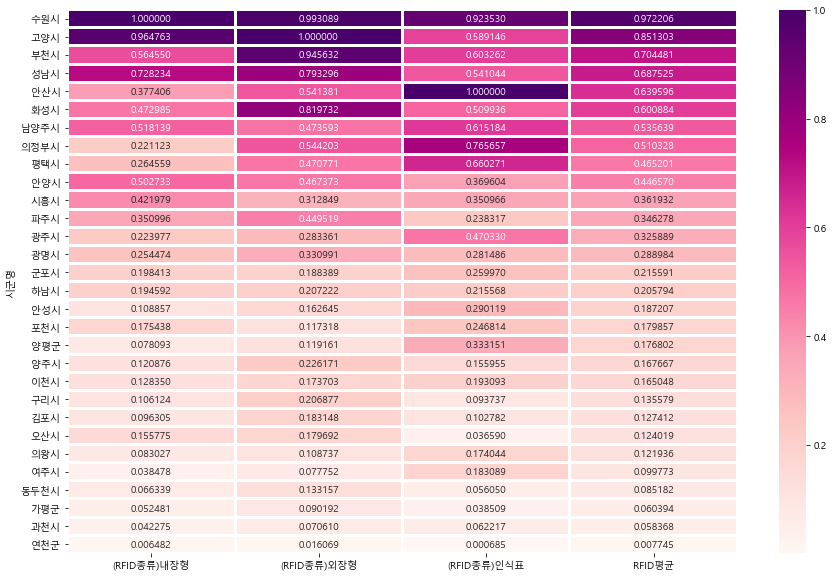

In [35]:
new_df_norm_sort = new_df_norm.sort_values(by='RFID평균', ascending=False)

plt.figure(figsize=(15,10))
sns.heatmap(new_df_norm_sort, cmap='RdPu',linewidth=2, annot=True, fmt='f')
plt.show()